<a href="https://colab.research.google.com/github/dajuctech/Deep_Learning_Course/blob/main/Week%201%20DL%201/IrisLR_Sln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Learning Rate Exercise
Exercise to adjust the learning rate of the optimiser

Load the libraries and prepare the data

In [1]:
import pandas as pd
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

# get the data
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Normalise the data
df_norm = normalize(df)

# 2. split the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(df_norm, data.target, random_state=0)

# one-hot encode the data
Y_train_cat = utils.to_categorical(Y_train)
Y_test_cat = utils.to_categorical(Y_test)


Create, compile, fit the model and plot the accuracy and loss


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3789 - loss: 1.1009 - val_accuracy: 0.3421 - val_loss: 1.1007
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2831 - loss: 1.1134 - val_accuracy: 0.3421 - val_loss: 1.0989
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3334 - loss: 1.1033 - val_accuracy: 0.3421 - val_loss: 1.0982
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3236 - loss: 1.1018 - val_accuracy: 0.3421 - val_loss: 1.0977
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3108 - loss: 1.1016 - val_accuracy: 0.3421 - val_loss: 1.0973
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2907 - loss: 1.1028 - val_accuracy: 0.3421 - val_loss: 1.0964
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3420 - loss: 1.0940 - val_accuracy: 0.3421 - val_loss: 1.0964
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3670 - loss: 1.0879 - val_accuracy: 0.3421 - 

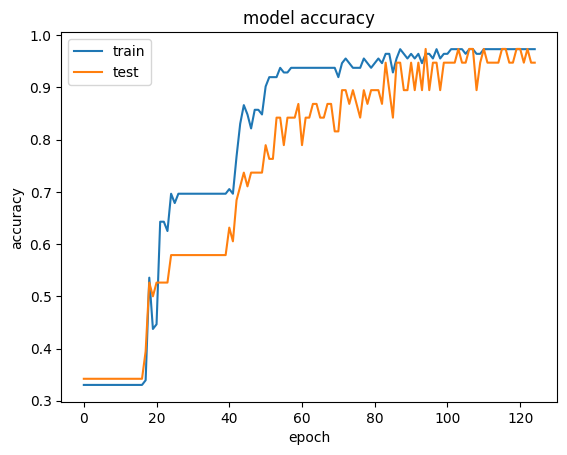

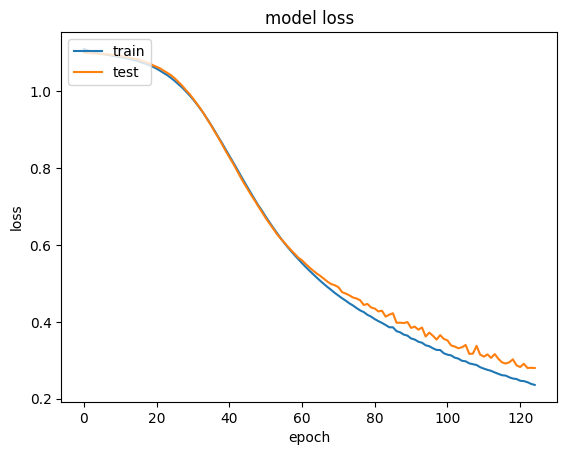

In [2]:
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

# 1. Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

## Adjust the learning rate of the optimiser
Instead of specifying the optimiser as a string, you can specify the optimiser as an object.  Specifying the optimiser as a string means that it uses it's default parameters.  By specifying it as an object, you have more flexibility and can change it's parameters.  Implement the optimiser as an object so you can change the learning rate (hint: see [keras optimisers](https://keras.io/api/optimizers)).  As we are using Keras from within tensorflow, you will also need to import tensorflow and reference keras from that.  Then you will be able to access the `optimizers` module as in the Keras documentation.



```
import tensorflow as tf
tf.keras.optimizers...
```



Set the learning rate to the following values.  You will need to re-create, re-compile and re-fit the model and re-plot the accuracy and loss to try out each learning rate.


*   0.0001
*   0.001
*   0.01
*   1.0




Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.3128 - loss: 1.1357 - val_accuracy: 0.2368 - val_loss: 1.1807
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3648 - loss: 1.1071 - val_accuracy: 0.2368 - val_loss: 1.1787
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3640 - loss: 1.1159 - val_accuracy: 0.2368 - val_loss: 1.1774
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3615 - loss: 1.1054 - val_accuracy: 0.2368 - val_loss: 1.1762
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3900 - loss: 1.1061 - val_accuracy: 0.2368 - val_loss: 1.1745
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4255 - loss: 1.0796 - val_accuracy: 0.2368 - val_loss: 1.1730
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3727 - loss: 1.0984 - val_accuracy: 0.2368 - val_loss: 1.1713
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3523 - loss: 1.1078 - val_accuracy: 0.

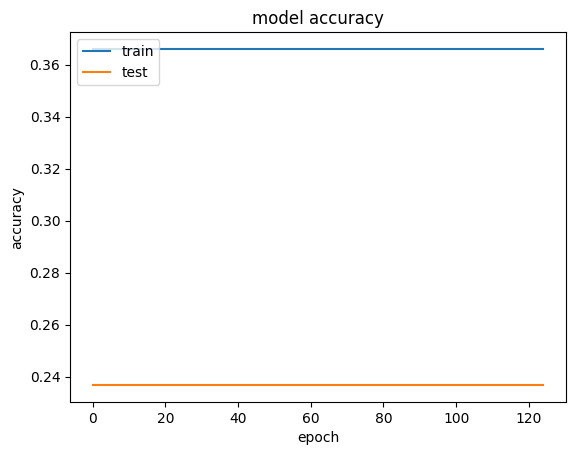

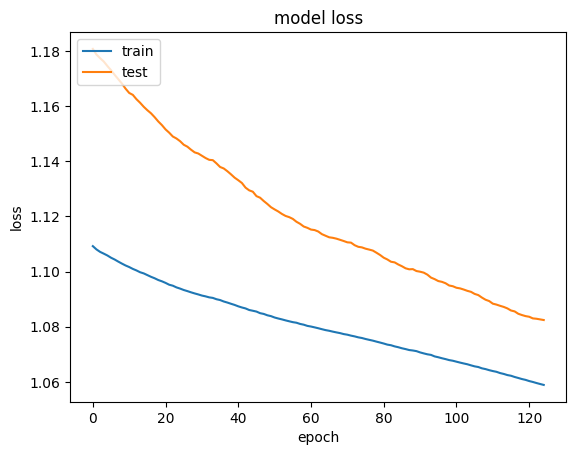

In [3]:
# adjusting the learning rate to 0.0001
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

import tensorflow as tf
# create an optimiser object and set the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
# Compile the model with the optimiser object
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Re-run the above code after editing the `learning_rate` parameter with the other values

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.1563 - loss: 1.1012 - val_accuracy: 0.1316 - val_loss: 1.1287
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2160 - loss: 1.1062 - val_accuracy: 0.2368 - val_loss: 1.1241
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3620 - loss: 1.1013 - val_accuracy: 0.2368 - val_loss: 1.1208
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3916 - loss: 1.0985 - val_accuracy: 0.2368 - val_loss: 1.1199
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3128 - loss: 1.1047 - val_accuracy: 0.2368 - val_loss: 1.1182
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3608 - loss: 1.0950 - val_accuracy: 0.2368 - val_loss: 1.1153
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3190 - loss: 1.1001 - val_accuracy: 0.2632 - val_loss: 1.1116
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3959 - loss: 1.0922 - val_accuracy: 0.3158 

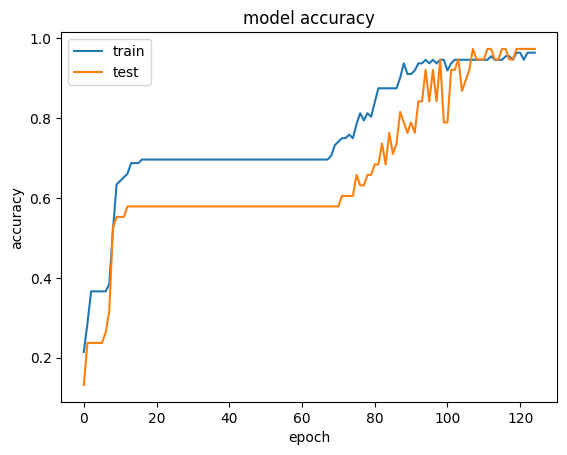

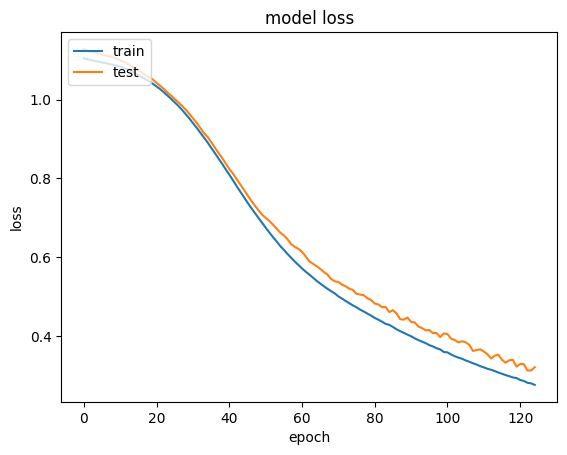

In [4]:
# adjusting the learning rate to 0.0001
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

import tensorflow as tf
# create an optimiser object and set the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compile the model with the optimiser object
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
# adjusting the learning rate to 0.0001
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

import tensorflow as tf
# create an optimiser object and set the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
# Compile the model with the optimiser object
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │              50 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 3)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3864 - loss: 3.3900 - val_accuracy: 0.3421 - val_loss: 1.0889
Epoch 2/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4274 - loss: 1.1026 - val_accuracy: 0.2368 - val_loss: 1.3678
Epoch 3/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2737 - loss: 1.3443 - val_accuracy: 0.2368 - val_loss: 1.1653
Epoch 4/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3007 - loss: 1.1655 - val_accuracy: 0.2368 - val_loss: 1.4019
Epoch 5/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3831 - loss: 1.2932 - val_accuracy: 0.3421 - val_loss: 1.1762
Epoch 6/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3712 - loss: 1.2681 - val_accuracy: 0.4211 - val_loss: 1.0906
Epoch 7/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2980 - loss: 1.1716 - val_accuracy: 0.2368 - val_loss: 1.2033
Epoch 8/125
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3099 - loss: 1.1840 - val_accuracy: 0.2368 -

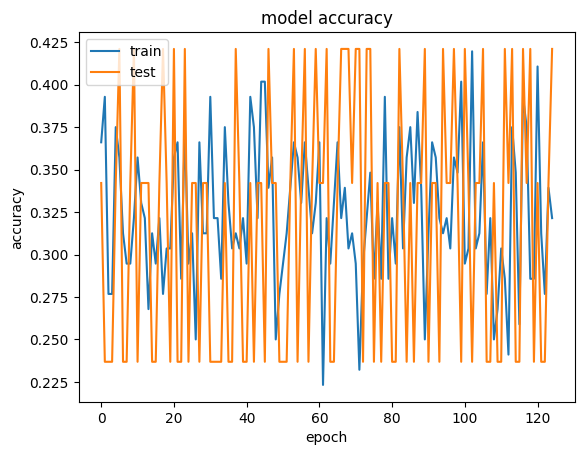

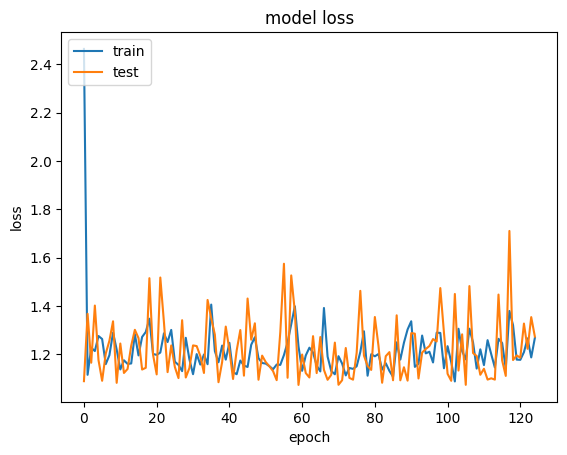

In [6]:
# adjusting the learning rate to 0.0001
model = Sequential()
model.add(Dense(units=10, input_dim=4, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.summary()

import tensorflow as tf
# create an optimiser object and set the learning rate
opt = tf.keras.optimizers.Adam(learning_rate=1.0)
# Compile the model with the optimiser object
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Fit the model
history = model.fit(
    X_train,    # input training data
    Y_train_cat,    # output training data
    batch_size=10,   # mini-batch gradient descent size
    epochs=125,       # number of iterations over the entire training data
    verbose=1,        # what type of information is printed during training
    validation_data=(X_test, Y_test_cat))  # input test data, output test data

# summarize the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# summarize the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**the effect of different learning rates on the model**

The learning rate is a hyperparameter that controls how much the model's weights are adjusted during each training iteration. A smaller learning rate means the model will learn more slowly, but it may be less likely to overshoot the optimal weights. A larger learning rate means the model will learn more quickly, but it may be more likely to overshoot the optimal weights and not converge.

Here's how the different learning rates you provided likely affected the model's performance:

**Learning Rate: 0.0001**

* **Effect:** This is a very small learning rate. The model will learn slowly and may require more epochs to converge. It's less prone to oscillations and may find a more stable solution, but it risks getting stuck in local minima if the learning rate is too low.
* **Observations:** You might observe a smooth, gradual decrease in loss and increase in accuracy. The validation accuracy might be close to the training accuracy, suggesting good generalization.

**Learning Rate: 0.001**

* **Effect:** This is a common starting point for learning rates. The model will learn faster than with 0.0001 and may converge in fewer epochs. It's still relatively stable, but oscillations are more likely compared to the previous case.

* **Observations:** You might see a faster decrease in loss and increase in accuracy compared to 0.0001. There might be some minor fluctuations in the validation metrics, but overall, the model should perform well.

**Learning Rate: 0.01**

* **Effect:** This is a relatively large learning rate. The model will learn quickly but may become unstable and oscillate around the optimal weights. It might overshoot the minima and fail to converge.
* **Observations :** You might observe rapid initial progress, but the loss and accuracy could start fluctuating wildly. The validation accuracy might be significantly lower than the training accuracy, indicating overfitting.

**Learning Rate: 1.0**

* **Effect:** This is a very large learning rate. The model is highly likely to diverge and fail to learn anything meaningful. The updates to the weights will be so large that the model will likely jump around the loss landscape without converging.

* **Observations:** You'll probably see the loss either remain very high or fluctuate dramatically without decreasing. The accuracy might stay low and not improve much during training.

**In Summary:**

The best learning rate depends on the specific dataset and model architecture. You should experiment with different values to find the learning rate that allows your model to converge quickly and achieve good performance on the validation set. In your case, it's likely that 0.001 or 0.01 would be a good starting point for further experimentation. Remember that a learning rate that's too high can lead to instability and divergence, while a learning rate that's too low can result in slow convergence and potential local minima traps. Finding the right balance is key.

* **0.0001:** This learning rate might be too low for this specific problem. While it leads to stable training, the model might be learning too slowly and not reaching its full potential within the given number of epochs (125). You might see gradual improvement, but it could benefit from a slightly faster learning process.

* **0.001:** This learning rate appears to be a good choice for this scenario. It provides a balance between speed and stability. You'll likely observe a faster decrease in loss and increase in accuracy compared to 0.0001, without significant oscillations or signs of divergence.

* **0.01:** This learning rate is on the higher side and could potentially lead to instability. While the model might learn quickly initially, it's more prone to overshooting the optimal weights and experiencing fluctuations in performance. You might need to monitor the training process closely and potentially reduce the learning rate if you see signs of divergence or overfitting.

* **1.0:** This learning rate is definitely too high and will likely cause the model to diverge. The updates to the weights will be too large, preventing the model from converging to a meaningful solution. You'll likely see the loss and accuracy behave erratically and fail to improve during training.

**Conclusion:**

Based on the observations and the typical behavior of learning rates, **0.001 seems to be the most appropriate learning rate** among the ones you tested for this specific model and dataset. It offers a good balance between speed and stability, allowing the model to learn effectively without significant risks of divergence or overfitting. While 0.01 could potentially work, it requires careful monitoring and might necessitate adjustments during training. The other two learning rates (0.0001 and 1.0) are likely too low and too high, respectively, for optimal performance.